<div style="border-radius: 10px; border: 2px solid #8B4513; padding: 15px; background-color: #FAF3E3; font-size: 16px; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
      <h2 style="font-family: 'Arial', sans-serif; color: #8B4513; text-transform: uppercase; letter-spacing: 1px;"> Personal Loan Data Analysis</h2>

## Data Description:                                     

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


## First lets import all the necessary liberaries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as ps
import warnings
warnings.filterwarnings("ignore")

## Check what we have in data 

In [133]:
df= pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 1)
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Check how big the data is 

In [134]:
df.shape

(5000, 14)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [136]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Check what all columns do we have in the data

In [137]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [138]:
df.drop(['ID','ZIP Code'], axis=1 , inplace=True)

In [139]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# 5 Number Summary 

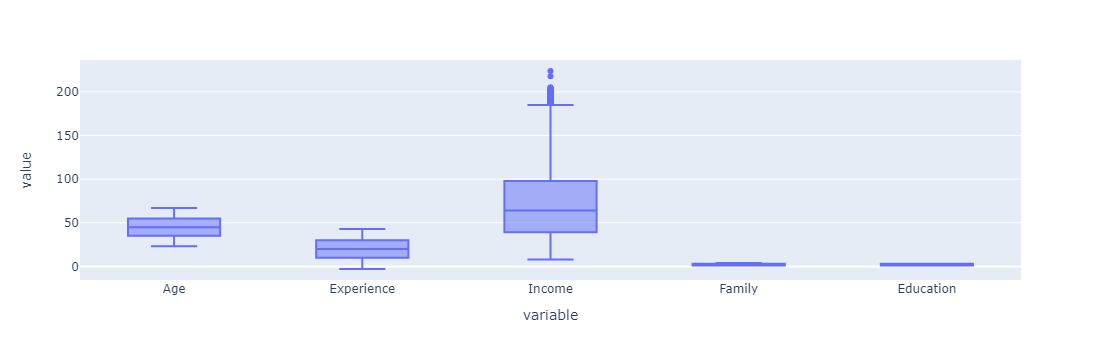

In [140]:
figure= ps.box(df, y= ['Age','Experience','Income','Family','Education'])
figure

## Starts extracting insights using the visualization 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

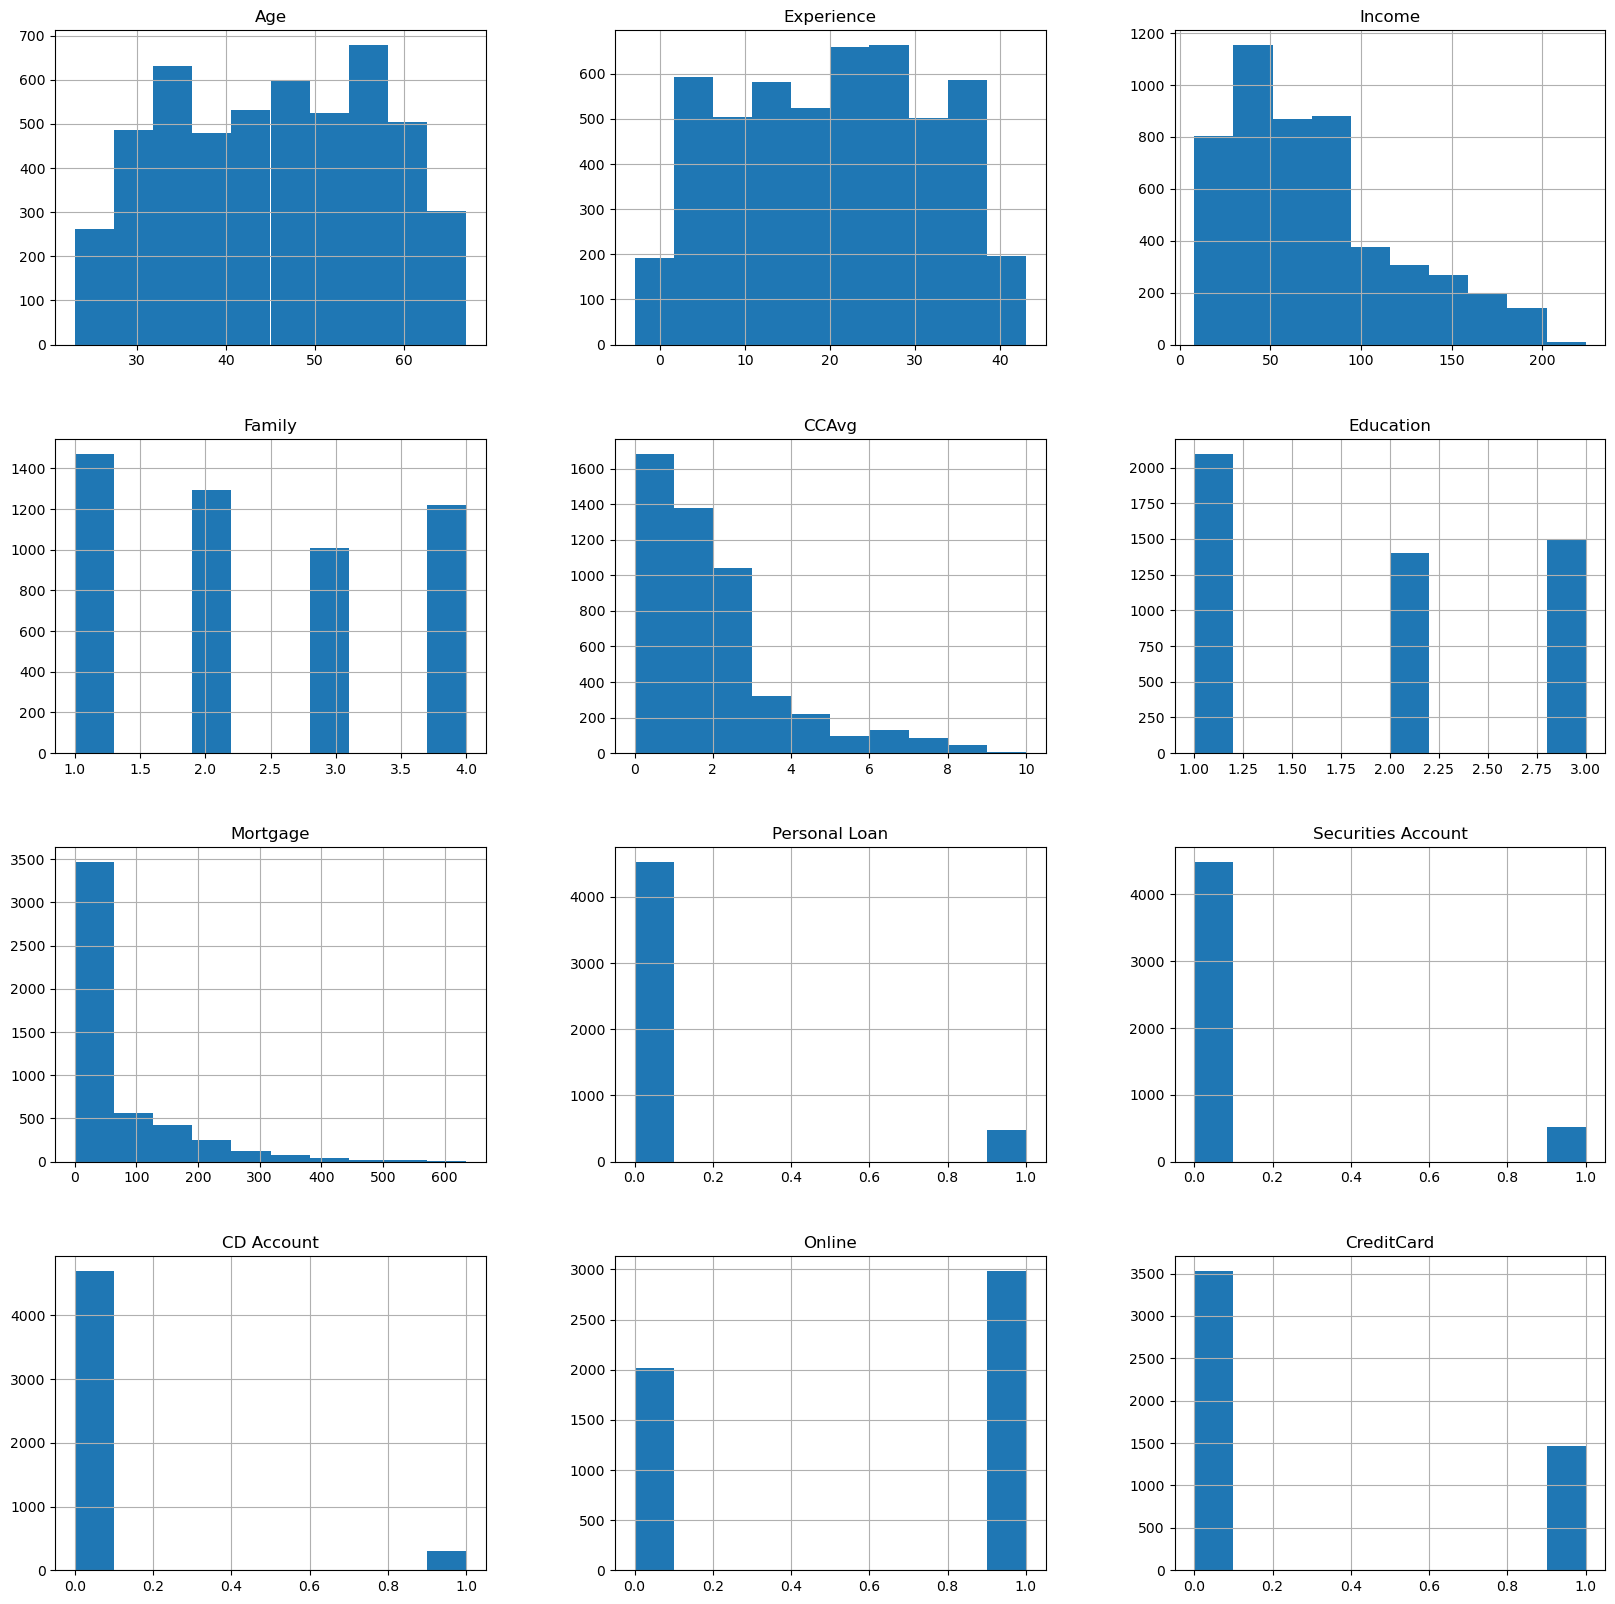

In [141]:
df.hist(figsize=(20,20))

From the above graphs we can see that
Firstly, the maximum people belong to the age range of 30-60 years.
secondly, the maximum experience people is having of 20-30 years. 
thirdly, the we can see for the income as well 
fourthly, the number of persons in the family
and so on for the other columns.

<Axes: xlabel='Experience', ylabel='Density'>

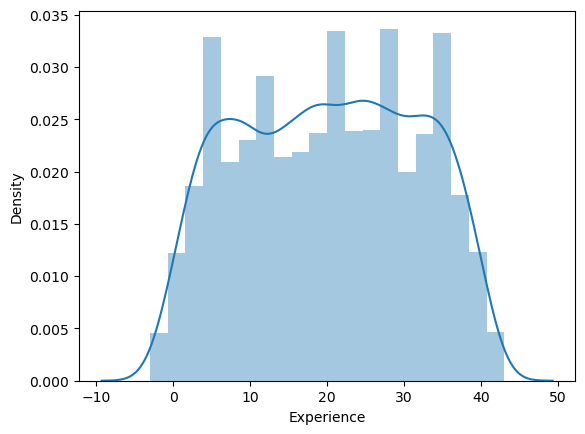

In [142]:
sns.distplot(df['Experience'])

From the above distribution plot we can see that some data is in negative, and becasue experience can not be in negative number so we need to handle it rightly. 

First, lets check how much data is in negative.

In [143]:
negative_exp=df[df['Experience']<0]
negative_exp.shape

(52, 12)

so overall 52 rows have the negative values

<Axes: xlabel='Age', ylabel='Density'>

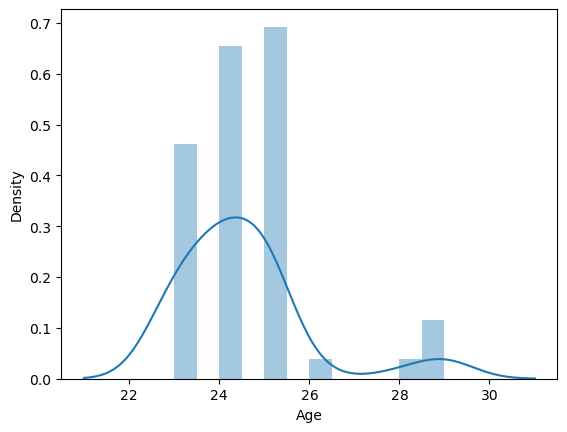

In [144]:
sns.distplot(negative_exp['Age'])

From the above graph we can clearly see that the people who have the negative experience belongs to the 22-30 age group. 

In [145]:
negative_exp.size

624

In [146]:
((negative_exp.size/df.size)*100)

1.04

There are 624 records which has negative values for experience, approx 1.04%'

Negative Data Handling 
for which we will create a new dataset by copying so that it wont't affect our original dataset 

In [147]:
data=df.copy()

In [148]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


so this new data named as "data" does not have any negative value 

In [149]:
data.shape

(5000, 12)

In [150]:
df.shape

(5000, 12)

In [151]:
data['Experience'].mean()

20.1046

In [152]:
data['Experience'].fillna(data['Experience'].mean(), inplace = True)

Check Correlation between columns using heatmap 

<Axes: >

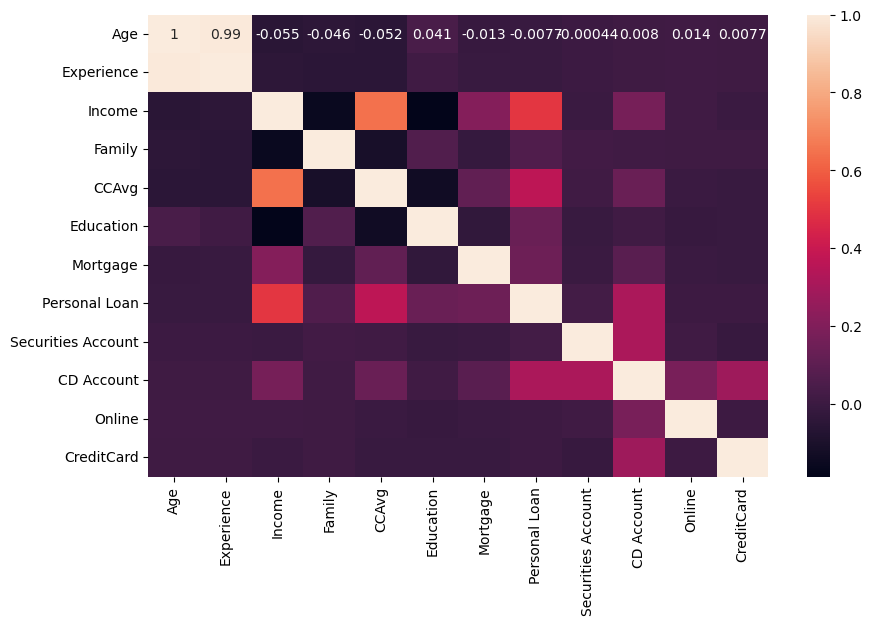

In [153]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot= True)

so as we can see from the above heatmap, the correlation between age and experience is quite high so we can drop either age column or experience column.so now in this situation we drop teh column according to our Domain criteria. According to our problem statement we have to check that to which customer we can provide the personal loan, so for that Age matters more than the Experience because if we have the age range so we can target the customer between 20-50 as it is obvious that he must be working between this age range, so we can neglect the experience here also, we have the Income column as well so on the basis of income we can provide the personal loan.

In [154]:
data =data.drop(['Experience'], axis =1)

In [155]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [156]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [157]:
def Education(x):
    if x== 1:
        return "Undergrad"
    if x== 2:
        return "Graduate"
    if x==3:
        return "Professional Person"


In [158]:
data['Education']=data['Education'].apply(Education)

In [159]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,4,1.0,Graduate,0,0,0,0,0,1


In [160]:
data['Education'].unique()

array(['Undergrad', 'Graduate', 'Professional Person'], dtype=object)

In [161]:
education_dis= data.groupby('Education')['Age'].count()

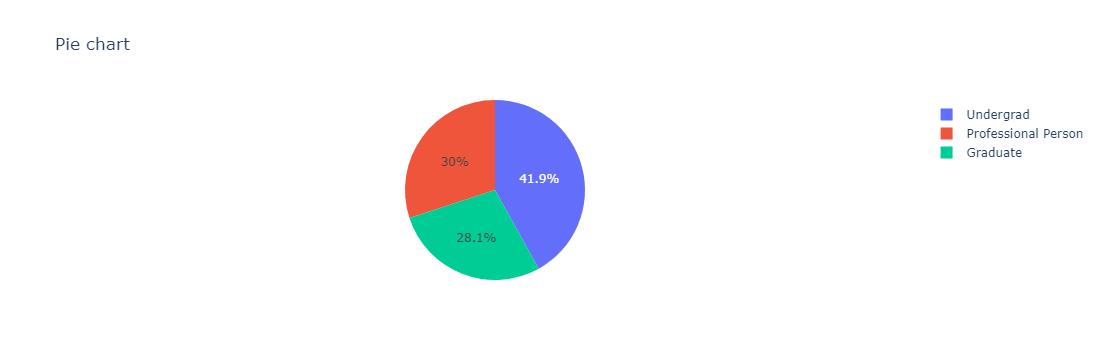

In [162]:
fig= ps.pie(data, values= education_dis, names= education_dis.index, title = "Pie chart")
fig.show()

In [163]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [164]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [165]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [166]:
data['Account holder category']=data.apply(security, axis =1 )

In [167]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Account holder category
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0,Holds only Scurites account
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0,Holds only Scurites account
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0,Does not hold Securites & Depsotie account
3,35,100,1,2.7,Graduate,0,0,0,0,0,0,Does not hold Securites & Depsotie account
4,35,45,4,1.0,Graduate,0,0,0,0,0,1,Does not hold Securites & Depsotie account


In [168]:
data['Account holder category'].value_counts()

Account holder category
Does not hold Securites & Depsotie account    4323
Holds only Scurites account                    375
Holds only Deposite account                    155
Holds Securities & Depostie                    147
Name: count, dtype: int64

In [169]:
values=data['Account holder category'].value_counts()
values

Account holder category
Does not hold Securites & Depsotie account    4323
Holds only Scurites account                    375
Holds only Deposite account                    155
Holds Securities & Depostie                    147
Name: count, dtype: int64

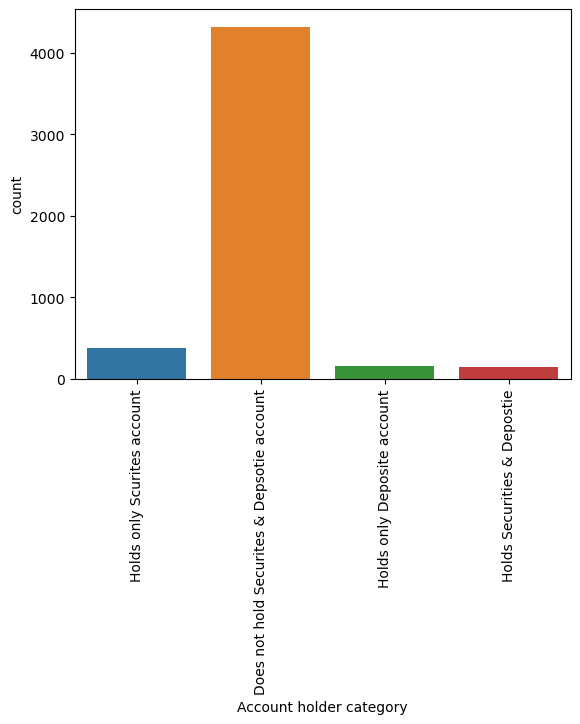

In [170]:
sns.countplot(data=data , x='Account holder category')
plt.xticks(rotation=90)
plt.xlabel('Account holder category')
plt.show()

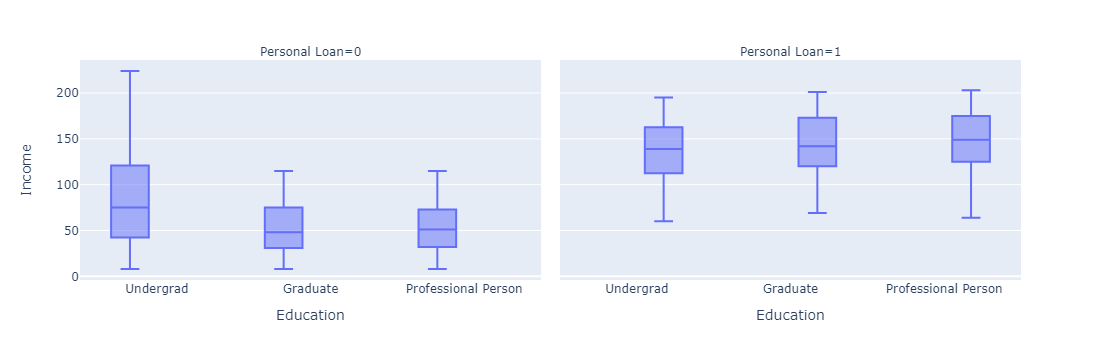

In [171]:
ps.box(data, x='Education', y='Income', facet_col='Personal Loan')

The first section of Personal Loan = 0 is defineing that this section have no personal loan and we can approach them for a personal loan and the other section which is Personal Loan = 1 is showing that they have the personal loan. from teh above graph we can say that the personal who is undergrad

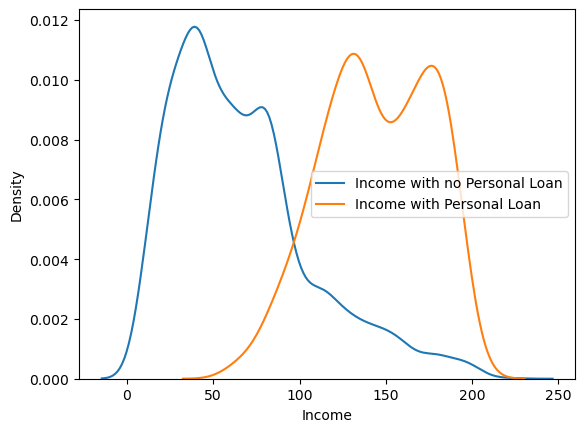

In [172]:
sns.distplot(data[data['Personal Loan']==0 ]['Income'],hist = False, 
             label = 'Income with no Personal Loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist = False,
             label ='Income with Personal Loan')
plt.legend()


In [173]:
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False, 
            label =lable1)
    
    sns.distplot(data[data[col2] == 1][col1], hist = False, 
            label = lable2)
    
    plt.legend()
    plt.title(title)

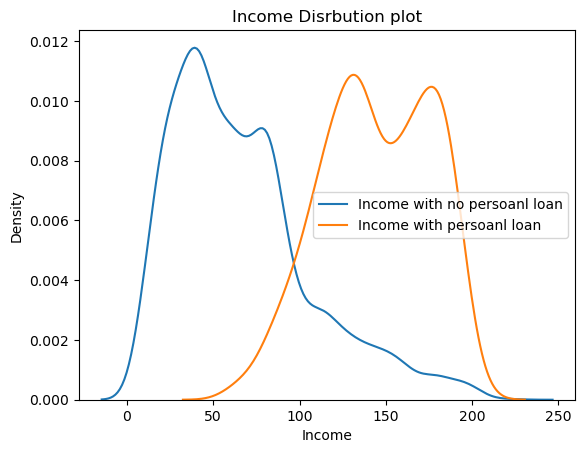

In [174]:
plot('Income', 'Personal Loan', "Income with no persoanl loan", "Income with persoanl loan", "Income Disrbution plot")


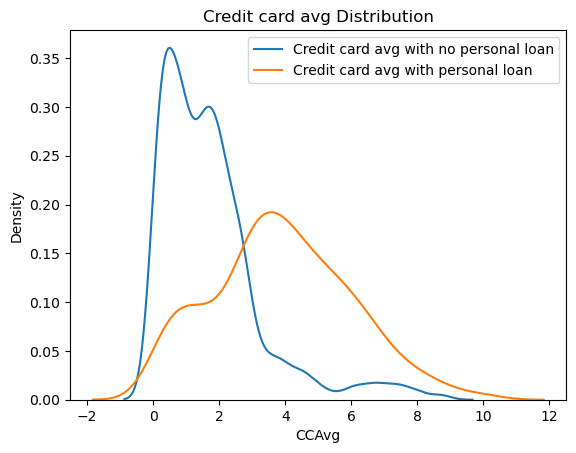

In [175]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')


Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.